
# Question 1: Kinematik Evolution of Euler Angles

In [1]:
import numpy as np
from solver import EulerAngleSolver
from plotter import SimulationPlotter, UnwrappedSimulationPlotter

### Check the calculation of initial conditions

Compute direction cosine matrix:

In [2]:
N_b1 = (1/3) * np.array([1, 2, -2])
N_b2 = (1/np.sqrt(2)) * np.array([0, 1, 1])
N_b3 = (1/(3*np.sqrt(2))) * np.array([4, -1, 1])

N_f1 = (1/4) * np.array([3, -2, np.sqrt(3)])
N_f2 = (1/2) * np.array([-1, 0, np.sqrt(3)])
N_f3 = (-1/4) * np.array([np.sqrt(3), 2*np.sqrt(3), 1])

C_NB = np.column_stack([N_b1, N_b2, N_b3])
C_NF = np.column_stack([N_f1, N_f2, N_f3])
C_FB = C_NF.T @ C_NB

Calculate Euler Angles:

In [3]:
theta_0 = -np.arcsin(C_FB[0, 2])
psi_0 = np.arctan2(C_FB[0, 1], C_FB[0, 0])
phi_0 = np.arctan2(C_FB[1, 2], C_FB[2, 2])

print("Initial Conditions (Roll, Pitch, Yaw):")
print(f"phi(0)    = {phi_0:.4f} rad")
print(f"theta(0)  = {theta_0:.4f} rad")
print(f"psi(0)    = {psi_0:.4f} rad")

Initial Conditions (Roll, Pitch, Yaw):
phi(0)    = -2.3482 rad
theta(0)  = -1.1864 rad
psi(0)    = -3.0149 rad


These give slightly different results: $\psi$ and $\phi$ are offset by $-\pi$ radians. I think this has something to do with the arctan function implementation of python. I will artificially correct these so they match the values I computed:

In [4]:
psi_0 = psi_0 + np.pi
phi_0 = phi_0 + np.pi

print("Initial Conditions (Roll, Pitch, Yaw):")
print(f"phi(0)    = {phi_0:.4f} rad = {np.degrees(phi_0):.2f} deg")
print(f"theta(0)  = {theta_0:.4f} rad = {np.degrees(theta_0):.2f} deg")
print(f"psi(0)    = {psi_0:.4f} rad = {np.degrees(psi_0):.2f} deg")

# State vector for simulation: [phi, theta, psi]
initial_euler_angles = np.array([phi_0, theta_0, psi_0])

Initial Conditions (Roll, Pitch, Yaw):
phi(0)    = 0.7934 rad = 45.46 deg
theta(0)  = -1.1864 rad = -67.97 deg
psi(0)    = 0.1266 rad = 7.26 deg


Numerically solve for the evolution of Euler Angles:

In [5]:
# Simulation Parameters
T_INITIAL = 0.0
T_FINAL = 30.0
DT = 0.01
ANGULAR_VELOCITY = np.array([1.0, 0.0, 0.5])

solver = EulerAngleSolver(initial_euler_angles, T_INITIAL, T_FINAL, DT, ANGULAR_VELOCITY)
time_points, angles_history = solver.solve()

print("Simulation complete.")

Simulation complete.


Generate the plots: the first one is modulo $2\pi$ and the y-axis ranges from $[-\pi,\pi)$. The second is unwrappepd.

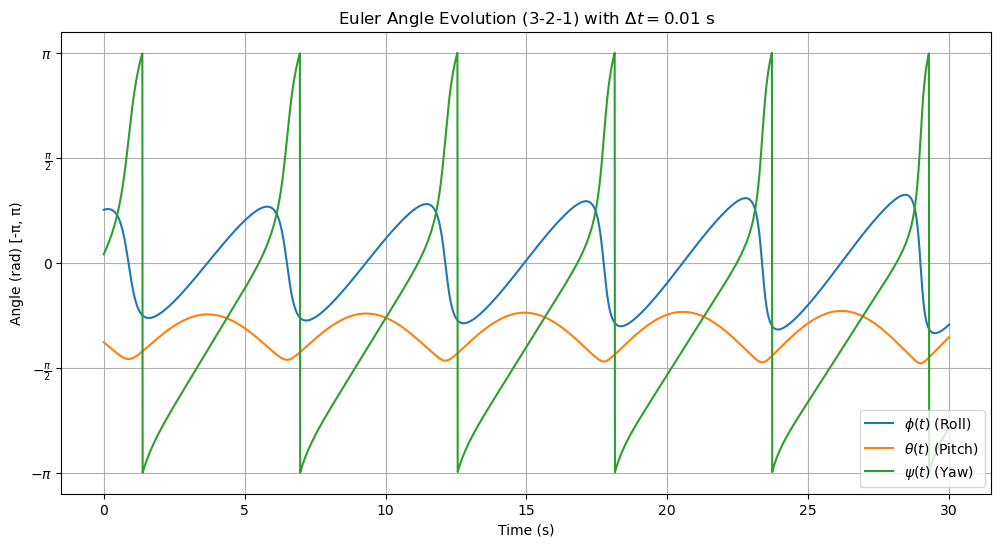

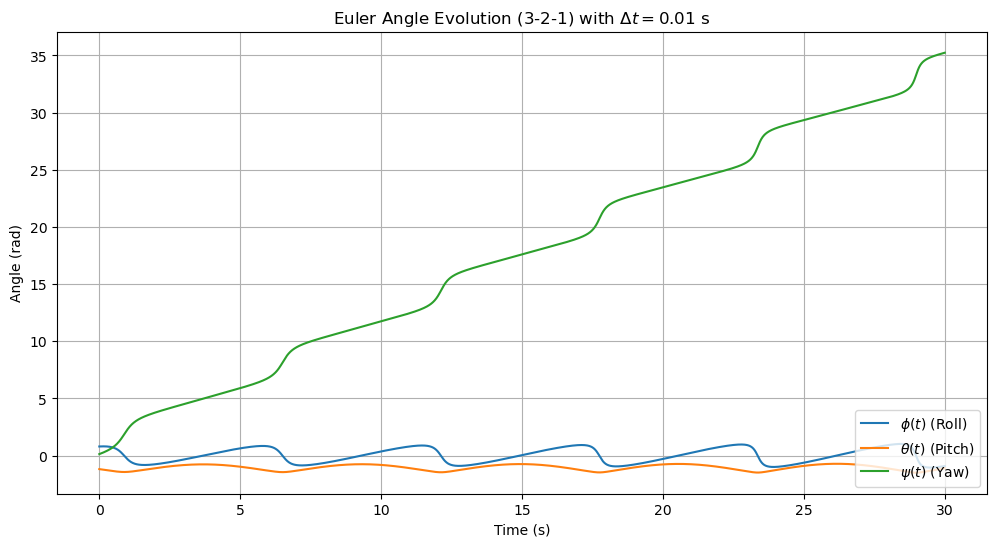

In [6]:
SimulationPlotter.plot_euler_angles(time_points, angles_history, DT)
UnwrappedSimulationPlotter.plot_euler_angles(time_points, angles_history, DT)